In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
apple_df = pd.read_csv('dataset/apple_quality.csv')

# Check Data

In [3]:
apple_df.head().style.highlight_null(color='yellow')

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.000000,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.000000,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.000000,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.000000,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.000000,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [4]:
apple_df.shape

(4001, 9)

In [5]:
apple_df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [6]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [7]:
apple_df.isnull().any().value_counts()

True     8
False    1
Name: count, dtype: int64

In [8]:
print(apple_df.isnull().sum().sum())
print(type(apple_df.isnull().sum().sum()))

8
<class 'numpy.int64'>


In [9]:
jumlah_null = apple_df.isnull().sum()
jumlah_null

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [10]:
apple_df[apple_df.isnull().values == True]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [11]:
'''
#jika ada 2 atau lebih null atau nan sebaris, oleh pandas baris tersebut ditampilkan sebanyak 
#jumlah null atau nan yang ada pada baris tersebut. oleh karena itu kita gunakan drop_duplicate()
'''

apple_df[apple_df.isnull().values == True].drop_duplicates().style.highlight_null(color='green')

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,nan,nan,nan,nan,nan,nan,nan,Created_by_Nidula_Elgiriyewithana,nan


In [12]:
apple_clear_df = apple_df.copy()
apple_clear_df = apple_clear_df.dropna()

In [13]:
apple_clear_df.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [14]:
apple_clear_df.isnull().any().value_counts()

False    9
Name: count, dtype: int64

In [15]:
apple_clear_df.shape

(4000, 9)

In [16]:
apple_clear_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


# Feature Engineering

In [17]:
apple_clear_df['Acidity'] = apple_clear_df['Acidity'].astype(float)

In [18]:
apple_clear_df.drop(['A_id'], axis=1, inplace=True)

In [19]:
apple_clear_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 281.2+ KB


In [20]:
apple_clear_df.duplicated().values.any()

False

# Target Engineering

In [21]:
apple_clear_df['Label'] = pd.get_dummies(apple_clear_df['Quality'], dtype=int,  drop_first= True)

In [22]:
apple_clear_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
 8   Label        4000 non-null   int32  
dtypes: float64(7), int32(1), object(1)
memory usage: 296.9+ KB


In [23]:
apple_clear_df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,Label
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good,1
...,...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good,1


In [24]:
dummies_df = pd.get_dummies(apple_clear_df['Quality'], dtype=int,  drop_first= True)
print(f'label 1 = {str(dummies_df.columns[0])}')

label 1 = good


# Data Splitting

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = apple_clear_df.drop(columns=['Quality', 'Label'])
y = apple_clear_df['Label']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((3200, 7), (800, 7), (3200,), (800,))

# Preprocessor

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
scaler.fit(X_train)

MinMaxScaler()

In [31]:
scaler.data_max_

array([6.4063669 , 5.79071359, 6.37491551, 7.6198518 , 7.36440286,
       7.23783668, 7.40473624])

In [32]:
scaler.data_min_

array([-7.15170306, -6.58158967, -6.35974912, -6.0550578 , -5.96189705,
       -5.86459892, -6.95546037])

In [33]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
print(X_train_scaled.max())
print(X_train_scaled.min())

1.0
0.0


In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
model_knn = KNeighborsClassifier(n_neighbors=3)

In [37]:
model_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
model_knn.score(X_train_scaled, y_train), model_knn.score(X_test_scaled, y_test)

(0.9459375, 0.8825)

In [39]:
from sklearn.pipeline import Pipeline

In [40]:
pipeline_model = Pipeline([
    ('prep_scale', MinMaxScaler()),
    ('model_clf', KNeighborsClassifier(n_neighbors=3))
])

In [41]:
pipeline_model.fit(X_train, y_train)

Pipeline(steps=[('prep_scale', MinMaxScaler()),
                ('model_clf', KNeighborsClassifier(n_neighbors=3))])

# GidSearcV

In [42]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

In [44]:
pipeline_model.get_params()

{'memory': None,
 'steps': [('prep_scale', MinMaxScaler()),
  ('model_clf', KNeighborsClassifier(n_neighbors=3))],
 'verbose': False,
 'prep_scale': MinMaxScaler(),
 'model_clf': KNeighborsClassifier(n_neighbors=3),
 'prep_scale__clip': False,
 'prep_scale__copy': True,
 'prep_scale__feature_range': (0, 1),
 'model_clf__algorithm': 'auto',
 'model_clf__leaf_size': 30,
 'model_clf__metric': 'minkowski',
 'model_clf__metric_params': None,
 'model_clf__n_jobs': None,
 'model_clf__n_neighbors': 3,
 'model_clf__p': 2,
 'model_clf__weights': 'uniform'}

In [48]:
parameter = {
    'model_clf__n_neighbors' : range(1,10),
    'model_clf__weights' : ['uniform', 'distance'],
    'model_clf__p' : [1, 2]
}

In [49]:
model_grid = GridSearchCV(pipeline_model, parameter, cv= 3, n_jobs=-1, verbose=1)

In [50]:
model_grid.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep_scale', MinMaxScaler()),
                                       ('model_clf',
                                        KNeighborsClassifier(n_neighbors=3))]),
             n_jobs=-1,
             param_grid={'model_clf__n_neighbors': range(1, 10),
                         'model_clf__p': [1, 2],
                         'model_clf__weights': ['uniform', 'distance']},
             verbose=1)

In [53]:
pd.DataFrame(model_grid.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model_clf__n_neighbors,param_model_clf__p,param_model_clf__weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
23,0.021081,5.709105e-03,0.054398,0.008463,6,2,distance,"{'model_clf__n_neighbors': 6, 'model_clf__p': ...",0.912840,0.896907,0.898687,0.902811,0.007128,1
35,0.015594,5.175642e-05,0.065587,0.012737,9,2,distance,"{'model_clf__n_neighbors': 9, 'model_clf__p': ...",0.916589,0.895033,0.895872,0.902498,0.009969,2
19,0.020501,4.909014e-03,0.060198,0.010232,5,2,distance,"{'model_clf__n_neighbors': 5, 'model_clf__p': ...",0.916589,0.891284,0.898687,0.902186,0.010623,3
18,0.026041,7.365302e-03,0.225928,0.015710,5,2,uniform,"{'model_clf__n_neighbors': 5, 'model_clf__p': ...",0.913777,0.891284,0.898687,0.901249,0.009360,4
31,0.018492,4.037168e-03,0.072425,0.003935,8,2,distance,"{'model_clf__n_neighbors': 8, 'model_clf__p': ...",0.912840,0.894096,0.894934,0.900623,0.008645,5
27,0.014542,5.143471e-03,0.069469,0.005101,7,2,distance,"{'model_clf__n_neighbors': 7, 'model_clf__p': ...",0.914714,0.892221,0.893996,0.900311,0.010211,6
30,0.025522,8.880613e-03,0.206241,0.007390,8,2,uniform,"{'model_clf__n_neighbors': 8, 'model_clf__p': ...",0.914714,0.893158,0.891182,0.899685,0.010658,7
34,0.013058,1.265938e-02,0.208135,0.006631,9,2,uniform,"{'model_clf__n_neighbors': 9, 'model_clf__p': ...",0.913777,0.890347,0.893996,0.899373,0.010293,8
26,0.021308,7.053365e-03,0.209767,0.006743,7,2,uniform,"{'model_clf__n_neighbors': 7, 'model_clf__p': ...",0.911903,0.890347,0.892120,0.898123,0.009770,9
29,0.015629,1.083865e-06,0.087977,0.004355,8,1,distance,"{'model_clf__n_neighbors': 8, 'model_clf__p': ...",0.910965,0.889410,0.891182,0.897186,0.009771,10


c:\Users\ARSY\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

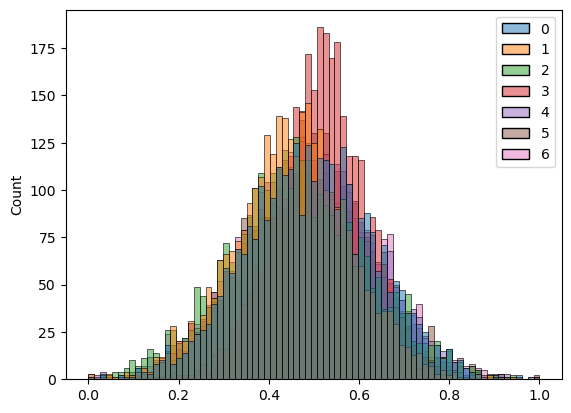

In [ ]:
sns.histplot(X_train_scaled)

<Axes: >

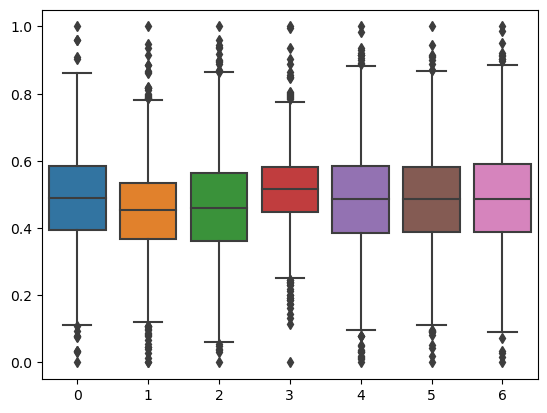

In [ ]:
sns.boxplot(X_train_scaled)

C:\Users\ARSY\AppData\Local\Temp\ipykernel_8188\3295641738.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(apple_clear_df.Acidity[apple_clear_df.Label==0], color='b', label='bad')
c:\Users\ARSY\anaconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ARSY\AppData\Local\Temp\ipykernel_8188\3295641738.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use e

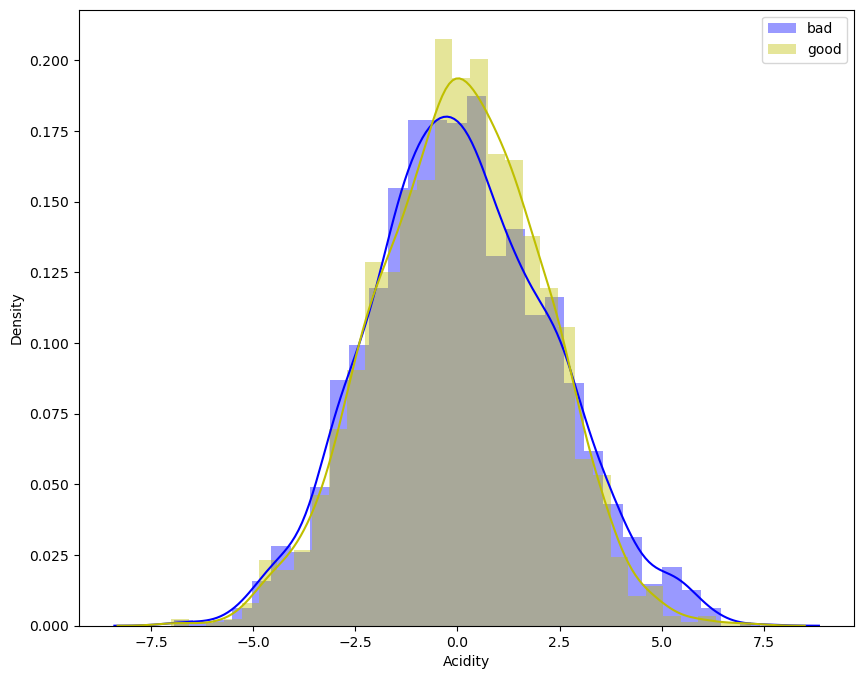

In [58]:
plt.figure(figsize=(10, 8))
sns.distplot(apple_clear_df.Acidity[apple_clear_df.Label==0], color='b', label='bad')
sns.distplot(apple_clear_df.Acidity[apple_clear_df.Label==1], color='y', label='good')
plt.legend()